### Thesis Research Notebook <br>
### LDR Data Augmentation for Convolutional Neural Network Construction 

Training on Cifar100

In [72]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [73]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [78]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [79]:
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train = x_train[5000:]
y_train = y_train[5000:]

In [80]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255


[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.7647059  0.8039216  0.75686276]
  [0.83137256 0.8784314  0.8       ]
  [0.7137255  0.7607843  0.654902  ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.6666667  0.6901961  0.5882353 ]
  [0.6313726  0.65882355 0.50980395]
  [0.57254905 0.6039216  0.44313726]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  ...
  [0.7411765  0.78039217 0.6627451 ]
  [0.6509804  0.69803923 0.50980395]
  [0.4745098  0.52156866 0.34117648]]

 ...

 [[0.5803922  0.7254902  0.30980393]
  [0.5568628  0.7137255  0.22352941]
  [0.54901963 0.7019608  0.23529412]
  ...
  [0.11764706 0.06666667 0.00392157]
  [0.25490198 0.24313726 0.05882353]
  [0.29803923 0.3019608  0.07843138]]

 [[0.47843137 0.6156863  0.25882354]
  [0.47058824 0.60784316 0.22745098]


In [57]:
pretrained_base = tf.keras.applications.vgg19.VGG19(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=[32,32,3], pooling=max, classes=None,
    classifier_activation='softmax'
)




In [65]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    # layers.experimental.preprocessing.RandomContrast(0.3),
    # layers.RandomTranslation((-0.2,0.2),(-0.2,0.2)),
    # layers.Rescaling(scale=1./255),
    layers.RandomZoom((0,0.2)),
    

])

In [69]:
import cv2  # import OpenCV
import numpy
from blend_modes import soft_light



ModuleNotFoundError: No module named 'blend_modes'

In [82]:
# Model Creation 
model = tf.keras.Sequential([
    # data_augmentation, 
    # pretrained_base,
    # First Convolutional Block
    # 32 filter layers, Kernel Size of 3 x 3. Relu activation.  Add zeroes all around so the image doesn't change size, Padding='same'.

    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[32, 32, 3]),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Second Convolution Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.Dropout(0.3),

    #Third Convolution Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    #Fourth Convolution Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.Dropout(0.3),

    #Fifth Convolution Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2),),

    
    #Fifth Convolution Block
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
    layers.Dropout(0.3),

    #Fifth Convolution Block
    layers.Conv2D(filters=2048, kernel_size=3, activation="relu", padding='same'),

    layers.BatchNormalization(),
     layers.MaxPool2D(pool_size=(2, 2),),

    
    #Classifer Head
    layers.Flatten(),
    layers.Dense(units=4096, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=2048, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(units=100, activation="softmax"),
])

In [60]:
opt = tf.optimizers.Adam(learning_rate=0.0001)

In [83]:
model.compile(
    optimizer=opt,
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_val,y_val),
    verbose=1,
)

Epoch 1/100
1407/1407 [==============================] - 24s 16ms/step - loss: 4.7530 - accuracy: 0.0374 - val_loss: 4.4448 - val_accuracy: 0.0544
Epoch 2/100
1407/1407 [==============================] - 23s 16ms/step - loss: 4.2310 - accuracy: 0.0678 - val_loss: 3.9254 - val_accuracy: 0.0988
Epoch 3/100
1407/1407 [==============================] - 23s 16ms/step - loss: 3.9831 - accuracy: 0.0896 - val_loss: 3.7266 - val_accuracy: 0.1294
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 3.7499 - accuracy: 0.1164 - val_loss: 3.5566 - val_accuracy: 0.1634
Epoch 5/100
1407/1407 [==============================] - 23s 16ms/step - loss: 3.5327 - accuracy: 0.1494 - val_loss: 3.7647 - val_accuracy: 0.1706
Epoch 6/100
1407/1407 [==============================] - 23s 16ms/step - loss: 3.3279 - accuracy: 0.1821 - val_loss: 3.0996 - val_accuracy: 0.2314
Epoch 7/100
1407/1407 [==============================] - 23s 17ms/step - loss: 3.1343 - accuracy: 0.2185 - val_loss: 3

KeyboardInterrupt: 

In [ ]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 3s 8ms/step - loss: 2.0142 - accuracy: 0.5291
test loss, test acc: [2.014188051223755, 0.5291000008583069]


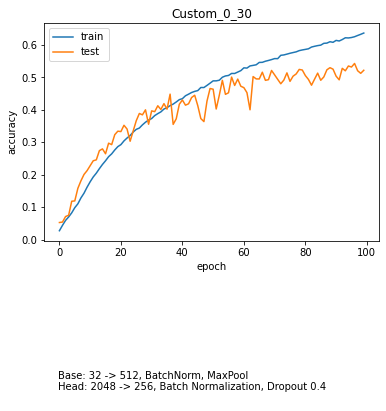

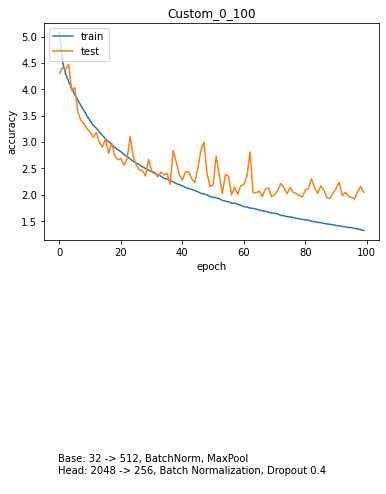

In [ ]:
# Plot the accuracy and loss after 30 Epochs


caption = 'Base: 32 -> 512, BatchNorm, MaxPool' '\n' 'Head: 2048 -> 256, Batch Normalization, Dropout 0.4' '\n'  

# Train/Test Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom_0_30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-.5, caption)
plt.show()

# Train/Test Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custom_0_100')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.text(-.5,-3.5, caption)
plt.show()